<a href="https://colab.research.google.com/github/hibatallahk/ML_Scoring_finance_industry/blob/main/ML_Scoring_finance_industry.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip3 install catboost

In [ ]:
!pip install scikit-learn

In [ ]:
# check scikit-learn version
import sklearn
print(sklearn.__version__)

0.22.2.post1


In [ ]:
# import pandas and numpy for data preprocessing and manipulation
import numpy as np
import pandas as pd
import random

# matplotlib for visualization
import matplotlib.pyplot as plt
%matplotlib inline
# seaborn for visualization
import seaborn as sns
from pandas import read_excel

# import train_test_split to split data
from sklearn.model_selection import *
from sklearn.preprocessing import *
pd.options.mode.chained_assignment = None # to avoid SettingWithCopyWarning after scaling

# import machine learning module from the sklearn library
from sklearn.dummy import DummyClassifier # import dummy classifier
from sklearn.tree import DecisionTreeClassifier # import decision tree classifier
from sklearn.linear_model import LogisticRegression # import logistic regression 
from sklearn.ensemble import RandomForestClassifier # import random forest algorithm
from catboost import CatBoostClassifier
import random
random.seed(42)
np.random.seed(42)
import logging
logger = logging.getLogger()
logger.setLevel(logging.CRITICAL)
from sklearn.metrics import *
from sklearn.metrics import roc_auc_score, roc_curve, precision_recall_curve

import sklearn.linear_model
import sklearn.metrics
import sklearn.neighbors
# import warnings
import warnings
warnings.filterwarnings('ignore')

# import sklearn utilities
from sklearn.utils import shuffle

from sklearn.feature_selection import SelectFromModel

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import make_scorer
from statsmodels.tsa.seasonal import seasonal_decompose
import matplotlib.pyplot as plt
from sklearn import model_selection, metrics
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import GridSearchCV

import xgboost as xgb 
from lightgbm import LGBMRegressor
RMSE_THRESHOLD=48
import sys
print (sys.version)

# ignore warnings
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import make_classification

3.7.12 (default, Sep 10 2021, 00:21:48) 
[GCC 7.5.0]


In [ ]:
#read the data
file_name = 'base score.xlsx' # change it to the name of your excel file
df = read_excel(file_name)
print(df.head()) # shows headers with top 5 rows

   qual      id  var1  var2  var3  ...  num10      num11      num12  num13  num14
0     0  653545     9  43.0     3  ...   8690  14.579558  28.092074     47    230
1     0  427314     2   7.0     3  ...   3534  33.037300  51.687389     62     31
2     0  307079     1  17.0     1  ...   4676  37.932993  51.723858     33     28
3     0  307080     2  10.0     1  ...   2392  23.713691  39.625260     50    160
4     0  310319     2   NaN     3  ...   7626  16.673590  32.721866     48    224

[5 rows x 22 columns]


# Data preproc

In [ ]:
# function to check na percent within the data
def get_percent_of_na(df, num):
    count = 0
    df = df.copy()
    s = (df.isna().sum() / df.shape[0])
    for column, percent in zip(s.index, s.values):
        num_of_nulls = df[column].isna().sum()
        if num_of_nulls == 0:
            continue
        else:
            count += 1
        print('Column {} has {:.{}%} percent of Nulls, and {} of nulls'.format(column, percent, num, num_of_nulls))
    if count != 0:
        print("\033[1m" + 'There are {} columns with NA.'.format(count) + "\033[0m")
    else:
        print()
        print("\033[1m" + 'There are no columns with NA.' + "\033[0m")
        
# function to display general information about the dataset
def get_info(df):
    """
    This function uses the head(), info(), describe(), shape() and duplicated() 
    methods to display the general information about the dataset.
    """
    print("\033[1m" + '-'*100 + "\033[0m")
    print('Head:')
    print()
    display(df.head())
    print('-'*100)
    print('Info:')
    print()
    display(df.info())
    print('-'*100)
    print('Describe:')
    print()
    display(df.describe())
    print('-'*100)
    display(df.describe(include='object'))
    print()
    print('Columns with nulls:')
    display(get_percent_of_na(df, 4))  # check this out
    print('-'*100)
    print('Shape:')
    print(df.shape)
    print('-'*100)
    print('Duplicated:')
    print("\033[1m" + 'We have {} duplicated rows.\n'.format(df.duplicated().sum()) + "\033[0m")
    print()

In [ ]:

100*df.isna().sum()/df.shape[0]

qual     0.000000
id       0.000000
var1     0.000000
var2     9.969236
var3     0.000000
var4     0.000000
var5     0.000000
var6     0.000000
num1     0.000000
num2     0.000000
num3     0.000000
num4     0.000000
num5     0.000000
num6     0.000000
num7     0.000000
num8     0.000000
num9     0.000000
num10    0.000000
num11    0.000000
num12    0.000000
num13    0.000000
num14    0.000000
dtype: float64

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,qual,id,var1,var2,var3,var4,var5,var6,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10,num11,num12,num13,num14
0,0,653545,9,43.0,3,17,4,1,59604.00,306247.50,48,8054.90,6124.95,40.0,238873.05,612495.0,59604,8690,14.579558,28.092074,47,230
1,0,427314,2,7.0,3,8,4,1,10697.91,80371.20,60,1995.06,1205.57,20.0,22905.79,120556.8,10697,3534,33.037300,51.687389,62,31
2,0,307079,1,17.0,1,26,2,1,12327.00,49583.33,36,1700.00,1190.00,50.0,58310.00,119000.0,12327,4676,37.932993,51.723858,33,28
3,0,307080,2,10.0,1,16,2,1,10087.00,95000.00,72,1605.63,1900.00,40.0,74100.00,190000.0,10087,2392,23.713691,39.625260,50,160
5,0,310289,2,6.0,3,7,4,1,354366.00,132500.00,25,6625.00,3180.00,50.0,155820.00,318000.0,354366,17365,4.900301,6.769837,43,62


In [ ]:
df.shape

(10828, 22)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10828 entries, 0 to 12026
Data columns (total 22 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   qual    10828 non-null  int64  
 1   id      10828 non-null  int64  
 2   var1    10828 non-null  int64  
 3   var2    10828 non-null  float64
 4   var3    10828 non-null  int64  
 5   var4    10828 non-null  int64  
 6   var5    10828 non-null  int64  
 7   var6    10828 non-null  int64  
 8   num1    10828 non-null  float64
 9   num2    10828 non-null  float64
 10  num3    10828 non-null  int64  
 11  num4    10828 non-null  float64
 12  num5    10828 non-null  float64
 13  num6    10828 non-null  float64
 14  num7    10828 non-null  float64
 15  num8    10828 non-null  float64
 16  num9    10828 non-null  int64  
 17  num10   10828 non-null  int64  
 18  num11   10828 non-null  float64
 19  num12   10828 non-null  float64
 20  num13   10828 non-null  int64  
 21  num14   10828 non-null  int64  
dty

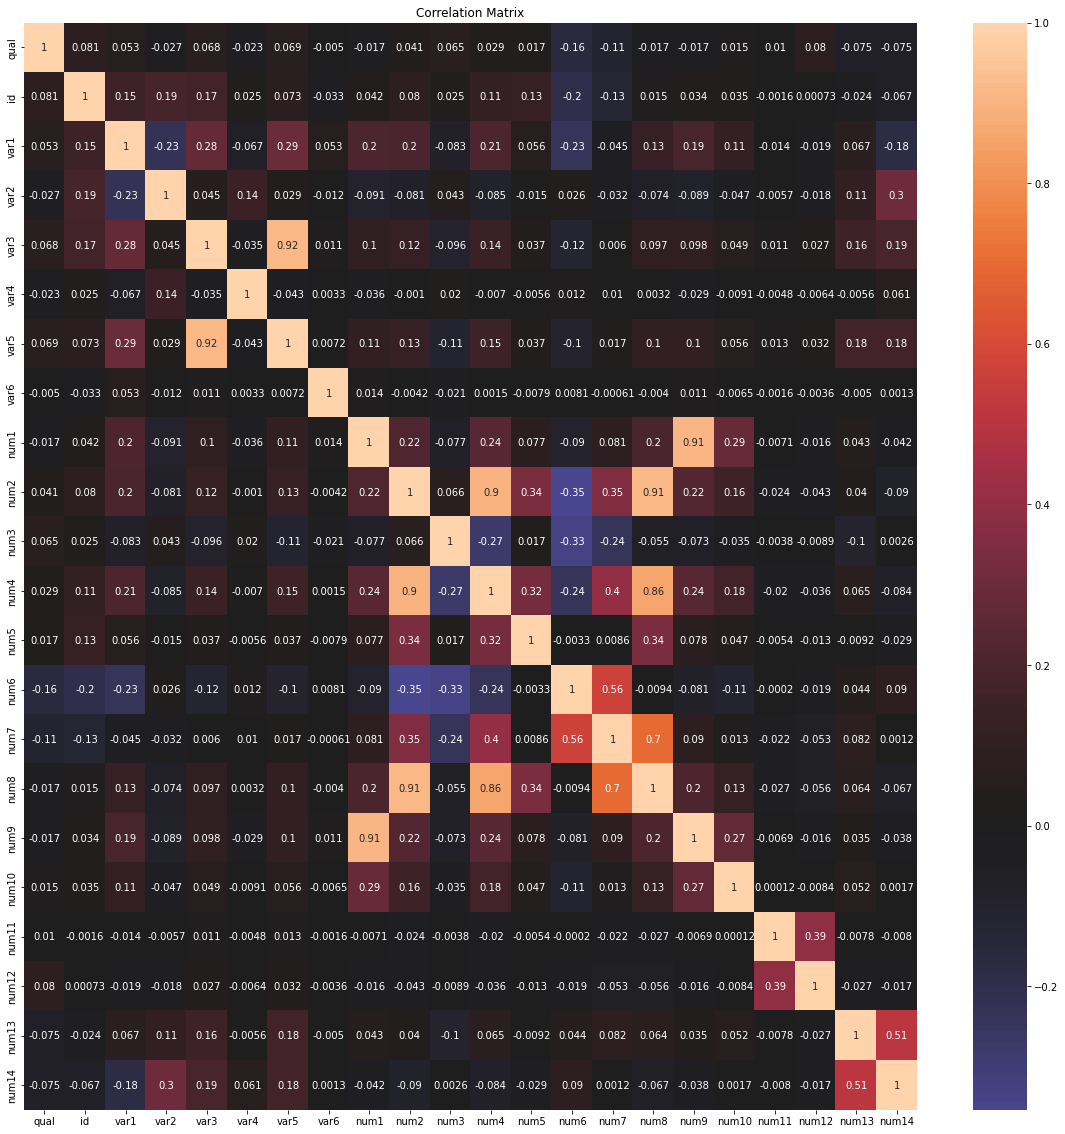

In [ ]:
plt.figure(figsize=(20, 20))
corr_mx=df.corr()
sns.heatmap(data=corr_mx, annot= True, center=0)
plt.title('Correlation Matrix')
plt.show()

# Feature preparation

In [ ]:
#id ne servira a rien dans notre prediction, alors on le suprime
df = df.drop(['id'], axis=1)

In [ ]:
#Declare features and target variables

target = df['qual']
features = df.drop(['qual'], axis=1)

In [ ]:
#Split data into training and testing

features_train, features_test, target_train, target_test = train_test_split(
    features, target, test_size=0.30, random_state=12345
)

# display the shape of the split dataset
print('The train set now contains {}'.format(features_train.shape[0]) + ' observations representing 70% of the data')
print('The test set now contains {}'.format(features_test.shape[0]) + ' observations representing 30% of the data')
print()

The train set now contains 7579 observations representing 70% of the data
The test set now contains 3249 observations representing 30% of the data



In [ ]:
#Features scaling

# numeric features in dataset
numeric = ['var1', 'var2',	'var3',	'var4',	'var5', 'var6',	'num1',	'num2', 'num3',	'num4',	'num5',	'num6',	'num7',	'num8',	'num9',	'num10',	'num11',	'num12',	'num13',	'num14']

# features scaling
scaler = StandardScaler()
scaler.fit(features_train[numeric])
# transform the training set and the test set using transform()
features_train[numeric] = scaler.transform(features_train[numeric])
features_test[numeric]  = scaler.transform(features_test[numeric])
    
print("\033[1m" + 'Shape of features and target' + "\033[0m")
print('-'*30)
print('Train features :', features_train.shape)
print('Train target   :',target_train.shape)
print('Test features  :',features_test.shape)
print('Test target    :',target_test.shape)
print()
display(features_train.head())

Shape of features and target
------------------------------
Train features : (7579, 20)
Train target   : (7579,)
Test features  : (3249, 20)
Test target    : (3249,)



,var1,var2,var3,var4,var5,var6,num1,num2,num3,num4,num5,num6,num7,num8,num9,num10,num11,num12,num13,num14
1916,1.698588,-0.587602,0.471430,-0.153537,0.547729,-0.062306,-0.207728,1.105226,0.759360,0.398427,-0.048750,-1.063006,-0.258707,0.683331,-0.203809,-0.156309,-0.023531,-0.052163,0.458677,-0.535294
7680,-0.546210,-0.587602,0.471430,0.011497,0.547729,-0.062306,-0.247025,-1.000083,-0.148721,-0.851766,-0.235236,0.211608,-0.854675,-1.120769,-0.237766,-0.140301,-0.017771,-0.051492,1.393374,0.221797
10166,-0.546210,2.639637,0.471430,-0.566121,0.547729,-0.062306,-0.235981,0.786048,0.759360,0.242602,-0.100779,-1.700312,-0.870127,0.179990,-0.228222,-0.098053,-0.010911,-0.048656,-0.476021,-0.514027
9639,1.698588,-0.664441,0.471430,-0.648638,0.547729,-0.062306,0.045859,-0.723285,-0.148721,-0.677213,-0.226416,-1.700312,-1.120641,-1.035443,0.015316,0.020785,-0.020092,-0.052884,1.393374,0.157997
6318,-0.546210,-0.126568,-2.164474,0.259048,-1.546740,-0.062306,-0.254595,-0.924709,-0.148721,-0.851192,-0.215410,0.848915,-0.544930,-0.928971,-0.244307,-0.156309,-0.023531,-0.051680,-1.325746,-0.497014


### Conclusion

# Examine the balance of classes

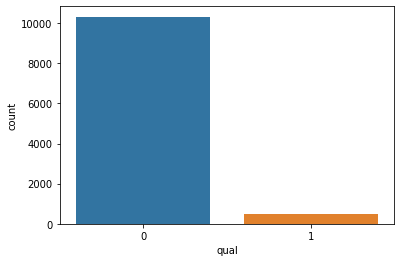

In [ ]:
sns.countplot(df['qual'])

In [ ]:
#comme on voit, cest flagrant le imbalance between classes
#let's take a deeper look
print(df[df['qual'] == 1]['qual'].count())
print(df[df['qual'] == 0]['qual'].count())

512
10316


In [ ]:
#une tres grande difference entre les classes, alors on doit voir comment cela peut impacter notre model
#dabord calculer evaluation metrics
def print_model_evaluation(y_test, test_predictions):
    print("\033[1m" + 'F1 score: ' + "\033[0m", '{:.3f}'.format(f1_score(y_test, test_predictions)))
    print("\033[1m" + 'Accuracy Score: ' + "\033[0m", '{:.2%}'.format(accuracy_score(y_test, test_predictions)))
    print("\033[1m" + 'Precision: ' + "\033[0m", '{:.3f}'.format(precision_score(y_test, test_predictions)))
    print("\033[1m" + 'Recall: ' + "\033[0m", '{:.3f}'.format(recall_score(y_test, test_predictions)))
    print("\033[1m" + 'Balanced Accuracy Score: ' + "\033[0m", '{:.2%}'.format(balanced_accuracy_score(y_test, test_predictions)))
    print("\033[1m" + 'ROC AUC Score: ' + "\033[0m", '{:.2%}'.format(roc_auc_score(y_test, test_predictions)))
    print()
    print("\033[1m" + 'Confusion Matrix' + "\033[0m")
    print('-'*50)
    print(confusion_matrix(y_test, test_predictions))
    print()
    print("\033[1m" + 'Classification report' + "\033[0m")
    print('-'*50)
    print(classification_report(y_test, test_predictions))
    print()

In [ ]:
#Baseline Model using a dummy classifier
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_train, target_train)
dummy_clf_test_predictions = dummy_clf.predict(features_test)
"""DummyClassifier is a classifier that makes predictions using simple rules.

This classifier is useful as a simple baseline to compare with other (real) classifiers. Do not use it for real problems.
"""
"""
“most_frequent”: always predicts the most frequent label in the training set.
"""

'\n“most_frequent”: always predicts the most frequent label in the training set.\n'

In [ ]:
# evaluate baseline model
print_model_evaluation(target_test, dummy_clf_test_predictions)

F1 score:  0.000
Accuracy Score:  95.32%
Precision:  0.000
Recall:  0.000
Balanced Accuracy Score:  50.00%
ROC AUC Score:  50.00%

Confusion Matrix
--------------------------------------------------
[[3097    0]
 [ 152    0]]

Classification report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.95      1.00      0.98      3097
           1       0.00      0.00      0.00       152

    accuracy                           0.95      3249
   macro avg       0.48      0.50      0.49      3249
weighted avg       0.91      0.95      0.93      3249




- Le modèle de base prédit la classe la plus fréquente dans ce cas "0". Cela permet de vérifier si notre modèle apprend réellement quelque chose à partir des données. On voit bien sur le rapport du modèle que la précision est élevée mais que le score F1 est de 0,0. Cela est dû au déséquilibre des classes. Cela montre que la précision seule n'est pas un bon critère pour évaluer les performances du modèle. Ensuite, nous examinons l'équilibre des classes et formons le modèle sans tenir compte du déséquilibre.

- Accuracy score est tres elevé mais le F1 Score est null(cest sureemnt du au 'class imbalance', alors on doit voir mieux
- On essai ici dentrainer notre model sans prendre en consideration le class imbalance et evaluer le resulat

In [ ]:
# create the logistic regression model
def logistic_regression(X_train, y_train, X_test, y_test):
    """
    This is a logistic regression model function developed to train
    the model, make prediction on train and test dataset, print
    model accuracy for training and testing datasets
    """
    model = LogisticRegression(random_state=12345, solver='liblinear')
    """
    To make the learning algorithm always use the same pseudorandom numbers, simply specify the random_state parameter:
You can set any value for random_state ("54321," "123," "0," or even a string). The important thing is to use the same value 
for as long as you want to get exactly the same model. Let's use the random_state value of "12345."
If you set random_state=None (the default value), the pseudorandomness will be always different.
    """
    """
    solver{‘newton-cg’, ‘lbfgs’, ‘liblinear’, ‘sag’, ‘saga’}, default=’lbfgs’
Algorithm to use in the optimization problem. Default is ‘lbfgs’. To choose a solver, you might want to consider the following aspects:
For small datasets, ‘liblinear’ is a good choice, whereas ‘sag’ and ‘saga’ are faster for large ones;
For multiclass problems, only ‘newton-cg’, ‘sag’, ‘saga’ and ‘lbfgs’ handle multinomial loss;

‘liblinear’ is limited to one-versus-rest schemes.
    """
    model.fit(X_train, y_train) # train the model 
    train_predictions = model.predict(X_train) # make predictions on train set
    test_predictions = model.predict(X_test) # make prediction on test set
    print('F1 score for logistic regression model')
    print('-'*35)
    print('F1 score: {:.3f}'.format(f1_score(y_test, test_predictions)))
    print()
    print('The default F1-score of the logistic regression model is ' "\033[1m" + 
          '{:.3f}.'.format(f1_score(y_test, test_predictions)) + "\033[0m" +
          ' The accuracy measured {:.3f}'.format(accuracy_score(y_train, train_predictions)) +
          ' for training set and {:.3f}'.format(accuracy_score(y_test, test_predictions)) + ' for the testing set.')

In [ ]:
# determine accuracy for logistic regression model
logistic_regression(features_train, target_train, features_test, target_test)

F1 score for logistic regression model
-----------------------------------
F1 score: 0.000

The default F1-score of the logistic regression model is 0.000. The accuracy measured 0.953 for training set and 0.953 for the testing set.


0    0.999692
1    0.000308
dtype: float64


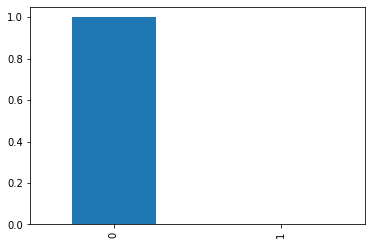

In [ ]:
# sanity check
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_train, target_train) # train the model 
test_predictions = pd.Series(model.predict(features_test))
class_frequency = test_predictions.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

- On doit ajuster encore plus

In [ ]:
model = LogisticRegression(random_state=12345, class_weight='balanced', solver='liblinear')
model.fit(features_train, target_train)
test_predictions = model.predict(features_test) 
print('F1 score with adjusted class weight: {:.3f}'.format(f1_score(target_test, test_predictions)))

F1 score with adjusted class weight: 0.174


- Voila le F1 score est mtn elevé a 0.174

0    0.658664
1    0.341336
dtype: float64


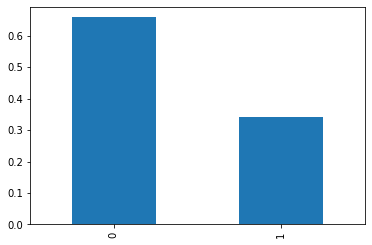

In [ ]:
# sanity check after class imbalance
test_predictions = pd.Series(model.predict(features_test))
class_frequency = test_predictions.value_counts(normalize=True)
print(class_frequency)
class_frequency.plot(kind='bar');

- On voit clairement ici, qu'en modifiant le class imbalance le F1 a augementé

In [ ]:
#upsampling
"""
When we train models, the classes can be balanced by increasing the sample size. The technique is called **upsampling**.
Upsampling is performed in several steps:
- Split the training sample by class.
- Determine the class with fewer observations. Call it the rare class.
- Duplicate the rarer class observations several times.
- Create a new training sample based on the data obtained.
- Shuffle the data.
"""
# function to perform upsampling 
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)

    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345
    )
    return features_upsampled, target_upsampled

# new training set created
features_upsampled, target_upsampled = upsample(
    features_train, target_train, 5
)

In [ ]:
# F1 score after upsampling 
model = LogisticRegression(random_state=12345, solver='liblinear')
model.fit(features_upsampled, target_upsampled)
test_predictions = model.predict(features_test) 
print('F1 score after upsampling: {:.3f}'.format(f1_score(target_test, test_predictions)))

F1 score after upsampling: 0.188


In [ ]:
#f1 score augmente

# Improve the quality of the model

In [ ]:
# function to plot ROC curve
def plot_roc(y_test, preds, ax=None, label='model'):
    with plt.style.context('seaborn-whitegrid'):
        """
        This function plots the ROC curve
        """
        if not ax: fig, ax = plt.subplots(1, 1)
        fpr, tpr, thresholds = roc_curve(y_test, preds)
        ax.plot([0, 1], [0, 1],'r--')
        ax.plot(fpr, tpr, lw=2, label=label)
        ax.legend(loc='lower right')
        ax.set_title(
            'ROC curve\n'
            f""" AP: {average_precision_score(
                y_test, preds, pos_label=1
            ):.2} | """
            f'AUC: {auc(fpr, tpr):.2}'
        )
        ax.set_xlabel('False Positive Rate (FPR)')
        ax.set_ylabel('True Positive Rate (TPR)')
        ax.annotate(f'AUC: {auc(fpr, tpr):.2}', xy=(.43, .025))
        ax.legend()
        ax.grid()
        return ax
    
# function to plot the precision-recall curve
def plot_pr(y_test, preds, ax=None, label='model'):
    with plt.style.context('seaborn-whitegrid'):
        """
        This function is used to the precision-recall curve 
        """
        precision, recall, thresholds = precision_recall_curve(y_test, preds)
        if not ax: fig, ax = plt.subplots()
        ax.plot([0, 1], [1, 0],'r--')    
        ax.plot(recall, precision, lw=2, label=label)
        ax.legend()
        ax.set_title(
            'Precision-recall curve\n'
            f""" AP: {average_precision_score(
                y_test, preds, pos_label=1
            ):.2} | """
            f'AUC: {auc(recall, precision):.2}'
        )
        ax.set_xlabel('Recall')
        ax.set_ylabel('Precision')
        ax.set_xlim(-0.05, 1.05)
        ax.set_ylim(-0.05, 1.05)
        ax.legend()
        ax.grid()
        return ax

- Ici on essaie avec le Hyperparameter Tuning sur les algo de classifications, afin de faire un benchmarking sur le meilleur par la suite

#### Decision Tree

In [ ]:
"""
# hyperparameter optimization for Decision tree classifier
parameters = {
    "criterion" : ["gini", "entropy"],
    "max_depth" : [2, 4, 8, 16],
    "min_samples_split" : [2, 4, 8, 16],
    "min_samples_leaf" : [2, 4, 6]
    }
classifier = DecisionTreeClassifier()
grid = GridSearchCV(classifier, parameters, scoring='f1', cv=5)
grid.fit(features_train, target_train) 
y_pred = grid.predict(features_test)
print('The parameters combination that would give best F1 score is : ')
print(grid.best_params_)
print('The best accuracy achieved after parameter tuning via grid search is: {:.3f}'.format(grid.best_score_))
print('The accuracy of the model against the training data is: {:.3f}'.format(grid.score(features_train, target_train)))
print('F1 score: ', f1_score(target_test, y_pred))
"""

'\n# hyperparameter optimization for Decision tree classifier\nparameters = {\n    "criterion" : ["gini", "entropy"],\n    "max_depth" : [2, 4, 8, 16],\n    "min_samples_split" : [2, 4, 8, 16],\n    "min_samples_leaf" : [2, 4, 6]\n    }\nclassifier = DecisionTreeClassifier()\ngrid = GridSearchCV(classifier, parameters, scoring=\'f1\', cv=5)\ngrid.fit(features_train, target_train) \ny_pred = grid.predict(features_test)\nprint(\'The parameters combination that would give best F1 score is : \')\nprint(grid.best_params_)\nprint(\'The best accuracy achieved after parameter tuning via grid search is: {:.3f}\'.format(grid.best_score_))\nprint(\'The accuracy of the model against the training data is: {:.3f}\'.format(grid.score(features_train, target_train)))\nprint(\'F1 score: \', f1_score(target_test, y_pred))\n'

In [ ]:
"""# create the decision tree classifier
def decision_tree_classifier(X_train, y_train, X_test, y_test):
    # define lists to collect scores
    train_scores = []
    test_scores = []
    f1_scores = []
    model = DecisionTreeClassifier(**grid.best_params_) 
    model.fit(X_train, y_train) # train the model
    # make predictions on train set
    train_predictions = model.predict(X_train)
    train_predictions_acc = accuracy_score(y_train, train_predictions)
    train_scores.append(train_predictions_acc)
    # make predictions on testing set
    dt_test_predictions = model.predict(X_test) 
    dt_test_predictions_acc = accuracy_score(y_test, dt_test_predictions)
    test_scores.append(dt_test_predictions_acc)
    f1_score_ = f1_score(y_test, dt_test_predictions)
    f1_scores.append(f1_score_)
    scores = list(zip(f1_scores, train_scores, test_scores))
    print('The decision tree classifier had the best ' "\033[1m" + 'F1 score of {:.3f}'.format(max(scores, key = lambda x: x[0])[0]) + "\033[0m" +   
          ' and accuracy of ' "\033[1m" '{:.2%}'.format(max(scores, key = lambda x: x[0])[1]) + ' for the training set' + "\033[0m" + 
          ' and ' + "\033[1m" '{:.2%}'.format(max(scores, key = lambda x: x[0])[2]) + ' for the testing set' + "\033[0m")
    print()
    # evaluate decision tree classifier metric
    print_model_evaluation(target_test, dt_test_predictions)"""

'# create the decision tree classifier\ndef decision_tree_classifier(X_train, y_train, X_test, y_test):\n    # define lists to collect scores\n    train_scores = []\n    test_scores = []\n    f1_scores = []\n    model = DecisionTreeClassifier(**grid.best_params_) \n    model.fit(X_train, y_train) # train the model\n    # make predictions on train set\n    train_predictions = model.predict(X_train)\n    train_predictions_acc = accuracy_score(y_train, train_predictions)\n    train_scores.append(train_predictions_acc)\n    # make predictions on testing set\n    dt_test_predictions = model.predict(X_test) \n    dt_test_predictions_acc = accuracy_score(y_test, dt_test_predictions)\n    test_scores.append(dt_test_predictions_acc)\n    f1_score_ = f1_score(y_test, dt_test_predictions)\n    f1_scores.append(f1_score_)\n    scores = list(zip(f1_scores, train_scores, test_scores))\n    print(\'The decision tree classifier had the best \' "\x1b" + \'F1 score of {:.3f}\'.format(max(scores, key = l

In [ ]:
"""# determine F1 score for decision tree classifier
decision_tree_classifier(features_train, target_train, features_test, target_test)"""

'# determine F1 score for decision tree classifier\ndecision_tree_classifier(features_train, target_train, features_test, target_test)'

**Conclusion**
- On a utilisé GridSearchCV pour le hyperparameter optimization sur le max_depth, criterion, min_samples_split, and min_samples_leaf parameters.
- Déja que nous cherchons le meilleur parameter setting pour notre decision tree classifier. On note que decision trees qui est peu profons (e.g. few depth) generallement do n' overfit pas mais a une pauvre performance (high bias, low variance), tandis que pour les arbres plus profondes (e.g. high depth) generallement overfit et ont une meilleur performance (low bias, high variance).
- Notre objectif est dobtenir une arbre avec une moyenne profondeur et une bonne performance. On doit avoir une balance entre bias and variance - (bias variance tradeoff).
- Avec un max_depht de 16, on a F1 score de 0.140, et accuracy de 93.17% pour le testing set.

#### Random Forest Classifier

In [ ]:
# hyperparameter optimization for Random Forest classifier
# define the hyperparameter to tune
parameters = {
    "criterion" : ["gini", "entropy"],
    "n_estimators" : [10, 30],
    "max_depth" : [None, 2, 4, 8],
    "min_samples_split" : [2, 4, 8],
    "min_samples_leaf" : [2, 4, 6]
    }
# define the model with default hyperparameters
classifier = RandomForestClassifier()
# define the grid search procedure
grid_rf = GridSearchCV(estimator=classifier, param_grid=parameters, 
                    cv=5, scoring='f1')
# execute the grid search
grid_rf.fit(features_train, target_train) 
y_pred = grid_rf.predict(features_test)
print('The parameters combination that would give best F1 score is : ')
print(grid_rf.best_params_)
print('The best accuracy achieved after parameter tuning via grid search is: {:.3f}'.format(grid_rf.best_score_))
print('The accuracy of the model against the training data is: {:.3f}'.format(grid_rf.score(features_train, target_train)))
print('F1 score: ', f1_score(target_test, y_pred))

The parameters combination that would give best F1 score is : 
{'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 4, 'n_estimators': 30}
The best accuracy achieved after parameter tuning via grid search is: 0.101
The accuracy of the model against the training data is: 0.754
F1 score:  0.13253012048192772


In [ ]:
# create the random forest classifier model
def random_forest_classifier(X_train, y_train, X_test, y_test):
    """
    This is a random forest classifier function developed to train
    the model, make prediction on train and testing dataset, 
    and print F1 score and evaluation metrics for testing datasets
    """
    # define lists to collect scores
    train_scores = []
    test_scores = []
    f1_scores = []
    model = RandomForestClassifier(**grid_rf.best_params_)
    model.fit(X_train, y_train) # train the model 
    # make predictions on train set
    train_predictions = model.predict(X_train)
    train_predictions_acc = accuracy_score(y_train, train_predictions)
    train_scores.append(train_predictions_acc)
    # make predictions on testing set
    rf_test_predictions = model.predict(X_test) 
    rf_test_predictions_acc = accuracy_score(y_test, rf_test_predictions)
    test_scores.append(rf_test_predictions_acc)
    f1_score_ = f1_score(y_test, rf_test_predictions)
    f1_scores.append(f1_score_)
    scores = list(zip(f1_scores, train_scores, test_scores))
    print('The random forest classifier had the best ' "\033[1m" + 
          'F1 score of {:.3f} '.format(max(scores, key = lambda x: x[0])[0]) + "\033[0m" + 
          'using' "\033[1m" + ' n_estimate value of {},'.format(grid_rf.best_params_['n_estimators']) + "\033[0m" +
          "\033[1m" + ' maximum tree depth of {}'.format(grid_rf.best_params_['max_depth']) + "\033[0m" +
          ' giving an accuracy of ' "\033[1m" + '{:.2%}'.format(max(scores, key = lambda x: x[0])[1]) + ' for the training set ' + "\033[0m" + 
          'and ' + "\033[1m" '{:.2%}'.format(max(scores, key = lambda x: x[0])[2]) + ' for the test set' + "\033[0m")
    print()
    # evaluate random forest classifier metric
    print_model_evaluation(target_test, rf_test_predictions)

In [ ]:
# determine accuracy for random forest classifier
random_forest_classifier(features_train, target_train, features_test, target_test)

The random forest classifier had the best F1 score of 0.108 using n_estimate value of 30, maximum tree depth of None giving an accuracy of 97.97% for the training set and 95.44% for the test set

F1 score:  0.108
Accuracy Score:  95.44%
Precision:  0.643
Recall:  0.059
Balanced Accuracy Score:  52.88%
ROC AUC Score:  52.88%

Confusion Matrix
--------------------------------------------------
[[3092    5]
 [ 143    9]]

Classification report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3097
           1       0.64      0.06      0.11       152

    accuracy                           0.95      3249
   macro avg       0.80      0.53      0.54      3249
weighted avg       0.94      0.95      0.94      3249




**Conclusion**
- Random Forest classifier nous resulte un F1 score de 0.142, accuracy de 97.82% pour le training set, et 95.54% pour le testing sets en utilisant un n_estimate de 50.

In [ ]:
# creer le model de classification CatBoost
def catboost_classifier(X_train, y_train, X_test, y_test):

# define model
    model = CatBoostClassifier(verbose=0, random_state=12345)
    model.fit(X_train, y_train) # train the model 
    # make predictions on train set
    train_predictions = model.predict(X_train)
    train_predictions_acc = accuracy_score(y_train, train_predictions)
    # make predictions on testing set
    cb_test_predictions = model.predict(X_test) 
    cb_test_predictions_acc = accuracy_score(y_test, cb_test_predictions)
    f1_score_ = f1_score(y_test, cb_test_predictions)
    print('The model has an ' "\033[1m" 'F1 score of {:.3f},'.format(f1_score_) + "\033[0m" +
          ' accuracy of ' "\033[1m" + '{:.2%}'.format(train_predictions_acc) + ' for the training set ' + "\033[0m" + 
          'and ' + "\033[1m" '{:.2%}'.format(cb_test_predictions_acc) + ' for the testing set' + "\033[0m")
    print()
    # evaluate catboost classifier metric
    print_model_evaluation(target_test, cb_test_predictions)

In [ ]:
# determine F1 score for CatBoost algorithm
catboost_classifier(features_train, target_train, features_test, target_test)

The model has an F1 score of 0.118, accuracy of 97.30% for the training set and 95.38% for the testing set

F1 score:  0.118
Accuracy Score:  95.38%
Precision:  0.556
Recall:  0.066
Balanced Accuracy Score:  53.16%
ROC AUC Score:  53.16%

Confusion Matrix
--------------------------------------------------
[[3089    8]
 [ 142   10]]

Classification report
--------------------------------------------------
              precision    recall  f1-score   support

           0       0.96      1.00      0.98      3097
           1       0.56      0.07      0.12       152

    accuracy                           0.95      3249
   macro avg       0.76      0.53      0.55      3249
weighted avg       0.94      0.95      0.94      3249




**Conclusion**
- Apres avoir évalué different models, on peut troncher que Random forrest classifier est le meilleur puisqu'il a le meilleur F1 score=  0.142, est la meilleur accuarcy = 95.54% > 90%, et AUC-ROC de 53.87%


# Performer le test final

- Après lévaluation sur la qualité du modèle, nous avons vu que le classificateur Random Forest est relativement le modèle le plus précis. 
- En utilisant le classificateur Random forest comme modèle final, nous pouvons faire des prédictions à l'aide du data testing.

In [ ]:
# create the random forest classifier model
def random_forest_classifier(X_train, y_train, X_test, y_test):
    """
    This is a random forest classifier function developed to train
    the model, make prediction on train and testing dataset, 
    and print F1 score and evaluation metrics for testing datasets
    """
    # define lists to collect scores
    train_scores = []
    test_scores = []
    f1_scores = []
    model = RandomForestClassifier(**grid_rf.best_params_)
    model.fit(X_train, y_train) # train the model 
    # make predictions on train set
    train_predictions = model.predict(X_train)
    train_predictions_acc = accuracy_score(y_train, train_predictions)
    train_scores.append(train_predictions_acc)
    # make predictions on testing set
    rf_test_predictions = model.predict(X_test) 
    rf_test_predictions_acc = accuracy_score(y_test, rf_test_predictions)
    test_scores.append(rf_test_predictions_acc)
    f1_score_ = f1_score(y_test, rf_test_predictions)
    print('The model has an ' "\033[1m" 'F1 score of {:.3f},'.format(f1_score_) + "\033[0m" +
          ' accuracy of ' "\033[1m" + '{:.2%}'.format(train_predictions_acc) + ' for the training set ' + "\033[0m" + 
          'and ' + "\033[1m" '{:.2%}'.format(rf_test_predictions_acc) + ' for the test set' + "\033[0m")
    # plot of ROC and Precision-Recall curve
    test_predict = model.predict_proba(X_test)
    test_predictions_one = test_predict[:,1]
    auc_roc = roc_auc_score(y_test, test_predictions_one)
    print('Area under the ROC Curve: {}'.format(auc_roc))


In [ ]:
# create the CatBoost classifier model
def catboost_classifier(X_train, y_train, X_test, y_test):
    """
    This is a catboost classifier function developed to train
    the model, make prediction on train and test dataset, print
    model accuracy for training and test datasets and visualize
    model accuracy scores on train and test sets
    """
    # define model
    model = CatBoostClassifier(verbose=0, random_state=12345)
    model.fit(X_train, y_train) # train the model 
    # make predictions on train set
    train_predictions = model.predict(X_train)
    train_predictions_acc = accuracy_score(y_train, train_predictions)
    # make predictions on test set
    test_predictions = model.predict(X_test)
    test_predictions_acc = accuracy_score(y_test, test_predictions)
    f1_score_ = f1_score(y_test, test_predictions)
    print('The model has an ' "\033[1m" 'F1 score of {:.3f},'.format(f1_score_) + "\033[0m" +
          ' accuracy of ' "\033[1m" + '{:.2%}'.format(train_predictions_acc) + ' for the training set ' + "\033[0m" + 
          'and ' + "\033[1m" '{:.2%}'.format(test_predictions_acc) + ' for the test set' + "\033[0m")
    # plot of ROC and Precision-Recall curve

In [ ]:
# determine accuracy for CatBoost algorithm
catboost_classifier(features_train, target_train, features_test, target_test)

The model has an F1 score of 0.118, accuracy of 97.30% for the training set and 95.38% for the test set


In [ ]:
# Random forest classifier + pr/roc curve
random_forest_classifier(features_train, target_train, features_test, target_test)

The model has an F1 score of 0.132, accuracy of 98.10% for the training set and 95.54% for the test set
Area under the ROC Curve: 0.7562751729177642


In [ ]:
#model_names = ['RandomForestRegressor','XGBRegressor','LightGBMRegressor']
def features_importance_sorted(model, X_test, y_test):
    features_sorted = model.feature_importances_.argsort()
    plt.figure(figsize=(10,8))
    plt.barh(features_train.columns[features_sorted],
            model.feature_importances_[features_sorted],
            color = 'blue')
    plt.xlabel(type(model).__name__)

In [ ]:
importances = grid_rf.best_estimator_.feature_importances_

In [ ]:
importances_sorted=importances.argsort()

Feature: 0, Score: 5.00000
Feature: 1, Score: 4.00000
Feature: 2, Score: 0.00000
Feature: 3, Score: 2.00000
Feature: 4, Score: 8.00000
Feature: 5, Score: 1.00000
Feature: 6, Score: 15.00000
Feature: 7, Score: 16.00000
Feature: 8, Score: 3.00000
Feature: 9, Score: 11.00000
Feature: 10, Score: 10.00000
Feature: 11, Score: 7.00000
Feature: 12, Score: 9.00000
Feature: 13, Score: 6.00000
Feature: 14, Score: 18.00000
Feature: 15, Score: 14.00000
Feature: 16, Score: 17.00000
Feature: 17, Score: 13.00000
Feature: 18, Score: 19.00000
Feature: 19, Score: 12.00000


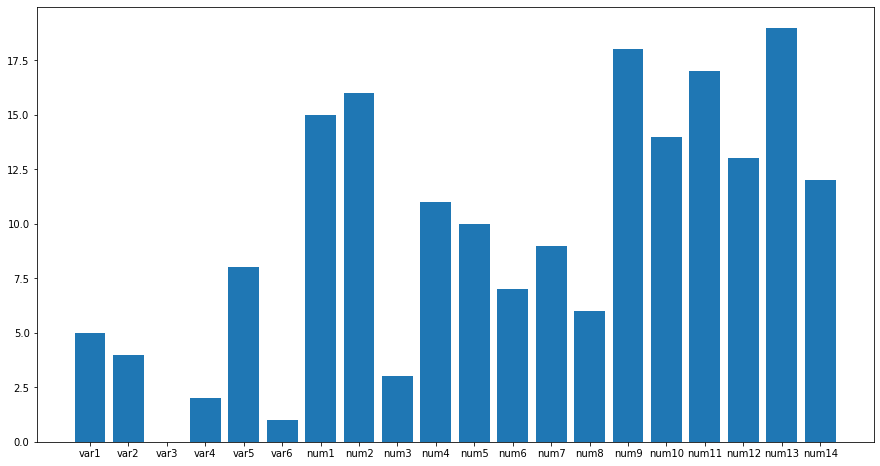

In [ ]:
for i,v in enumerate(importances_sorted):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.figure(figsize=(15,8))
plt.bar(numeric, importances_sorted)
plt.show()

- On peut voir que les variables qui impactent le plus la variable cible. 
- On conclut que 
  - num1, num2, num9, num11, num13 sont les plus importante pour notre modèle predictive.
  - num4, num5, num10, num12, num14 sont les moins importants
  - var4, var6 n'ont presque pas d'influence sur notre prediction.


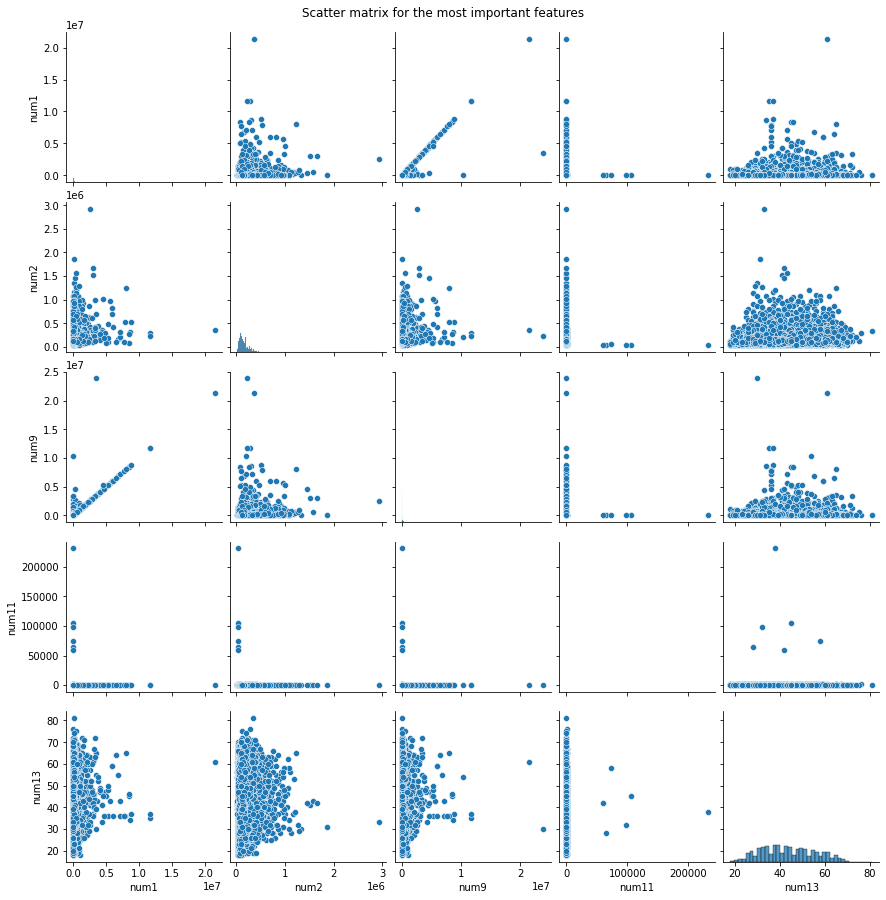

In [ ]:
ax = sns.pairplot(
    df[['num1', 'num2', 'num9', 'num11', 'num13']]
)

ax.fig.suptitle('Scatter matrix for the most important features', y=1);

- A scatter plot matrix is a grid (or matrix) of scatter plots used to visualize bivariate relationships between combinations of variables. Each scatter plot in the matrix visualizes the relationship between a pair of variables, allowing many relationships to be explored in one chart.
- Ici on visualise les relations entre les combinaisons de variables. Chaque nuage de points de la matrice visualise la relation entre une paire de variables.

# Concluison Genéral

L'objectif business de ce projet est de prédire le comportement des clients, sur la base d’un score (0 ou 1), pour ce faire, on est passé par les étapes suivantes:
- Dans la première partie, on a téléchargé la dataset. On a vu qu’elle contient 10828 entrées et 22 colonnes. Aussi, 9.969236 % de data manquantes dans la colonnes `var2`. Puisque le pourcentage de cette dernière est de moins de 10%, alors on peut la supprimer sans biaiser la totalité de la data.
- On a après affiché la matrice de corrélation, et on a remarqué que les corrélations entre les variables sont centrés au milieu de la matrice ( corr between num1 and num2, num2 and num3….jusqu’a num 10)
- On a par la suite découpé la data en 70% training et 30% testing set.
Puisque les données sont toutes numérique, on n’a pas eu besoin de faire une standardisation (One Hot Encoding for example)
- On a vu que le résultat du découpage de la data est de: 
train set now contains 7579 observations representing 70% of the data
test set now contains 3249 observations representing 30% of the data
- On a vu que la colonne id ne rajoute pas de valeur ajouté pour la prédiction, alors on la supprime
- On a après entrainé le modèle en prenant en considération le déséquilibre de classe(class imbalance)
- On a amélioré alors la qualité du modèle en utilisant 2 approches:
en premier en divise les données d'entraînement en observations positives, après on les combine avec les négatives. Ensuite on mélange la data en utilisant shuffle(), en entraînant notre modèle de LogisticRegression  avec la nouvelle data. Après on calcule le F1 score et on vérifie l'amélioration de ce dernier.
- On a entrainé 3 models avec different hyperparameters tuning, et le résultat est le suivant:
Random Forest est relativement le plus performant dans notre use case, puisque, avec un max_depht de 16 et un n_estimators de 70, nous avons pu arrivé à un F1 score de 0.120, et une accuracy de 97.94% pour les données de training et 95.51% pour le test set, et avec un ROC Curve de 0.72. Ce qui représente le meilleur résultat dans notre cas.
- Après notre benchmarking et évaluation on peut dire qu’on a répondu à l'objectif business de ce projet qui est de prédire le comportement des client(bon/mauvais).

- 